<a href="https://colab.research.google.com/github/xDD5/EcONOM/blob/main/PROJET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\color{red}{Corrélation\,entre\,l'\,indice\,Allemand\,DAX\,et\,l'\,inflation\,en\,Europe:}$





In [1]:
#installer les librairies
install.packages("quantmod")
library(quantmod)

# Definir le symbole DAX
symbol_dax <- "DAX"

# Définir les horizons :
start_date <- "2010-01-01"
end_date <- "2023-09-01"

# Télécharger les données de DAX monthly
getSymbols(symbol_dax, src = "yahoo", from = start_date, to = end_date, auto.assign = TRUE)
monthly_data <- to.monthly(DAX, name = "DAX_monthly")

# Enregistrer les données en format CSV :
write.csv(monthly_data, file = "DAX_monthly_data.csv")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "DAX"

In [2]:
DAX <- read.csv("DAX_monthly_data.csv")
head (DAX)

,X,DAX_monthly.Open,DAX_monthly.High,DAX_monthly.Low,DAX_monthly.Close,DAX_monthly.Volume,DAX_monthly.Adjusted
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,25.090,25.75,25.028,25.750,50500,20.93070
2,2,26.050,27.34,25.250,27.330,12100,22.21499
3,3,28.010,29.00,24.400,26.163,8800,21.26641
4,4,26.163,27.00,24.880,26.500,300300,21.54033
5,5,27.060,28.11,26.320,28.021,468900,22.77666
6,6,28.560,29.18,27.040,28.220,725300,22.93842


In [3]:
dates <- seq(as.Date("2010-01-01"), as.Date("2023-10-01"), by = "1 month")

DAX <- data.frame(
  Date = index(monthly_data),
  DAX = coredata(monthly_data)
)
head(DAX)

,Date,DAX.DAX_monthly.Open,DAX.DAX_monthly.High,DAX.DAX_monthly.Low,DAX.DAX_monthly.Close,DAX.DAX_monthly.Volume,DAX.DAX_monthly.Adjusted
,<yearmon>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Oct 2014,25.090,25.75,25.028,25.750,50500,20.93070
2,Nov 2014,26.050,27.34,25.250,27.330,12100,22.21499
3,Dec 2014,28.010,29.00,24.400,26.163,8800,21.26641
4,Jan 2015,26.163,27.00,24.880,26.500,300300,21.54033
5,Feb 2015,27.060,28.11,26.320,28.021,468900,22.77666
6,Mar 2015,28.560,29.18,27.040,28.220,725300,22.93842


In [4]:
CPI <- read.csv("CPI.csv")
head(CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,OECD,CPI,TOT,AGRWTH,M,2010-01,2.047299,NA
2,OECD,CPI,TOT,AGRWTH,M,2010-02,1.879990,NA
3,OECD,CPI,TOT,AGRWTH,M,2010-03,2.047934,NA
4,OECD,CPI,TOT,AGRWTH,M,2010-04,2.065891,NA
5,OECD,CPI,TOT,AGRWTH,M,2010-05,1.944904,NA
6,OECD,CPI,TOT,AGRWTH,M,2010-06,1.460480,NA


In [5]:
# Delete the "TIME" column
CPI <- CPI[, -which(names(CPI) == "TIME")]


In [6]:
head (CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,OECD,CPI,TOT,AGRWTH,M,2.047299,NA
2,OECD,CPI,TOT,AGRWTH,M,1.879990,NA
3,OECD,CPI,TOT,AGRWTH,M,2.047934,NA
4,OECD,CPI,TOT,AGRWTH,M,2.065891,NA
5,OECD,CPI,TOT,AGRWTH,M,1.944904,NA
6,OECD,CPI,TOT,AGRWTH,M,1.460480,NA


In [7]:
# Save the "CPI" data frame to a CSV file
write.csv(CPI, file = "Modified_CPI_Data.csv", row.names = FALSE)
head(CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,OECD,CPI,TOT,AGRWTH,M,2.047299,NA
2,OECD,CPI,TOT,AGRWTH,M,1.879990,NA
3,OECD,CPI,TOT,AGRWTH,M,2.047934,NA
4,OECD,CPI,TOT,AGRWTH,M,2.065891,NA
5,OECD,CPI,TOT,AGRWTH,M,1.944904,NA
6,OECD,CPI,TOT,AGRWTH,M,1.460480,NA


In [8]:
# Create a sequence of dates from "2020-01-01" to "2023-09-01" (one month increments)
dates <- seq(as.Date("2010-01-01"), as.Date("2023-09-01"), by = "1 month")

CPI$Date <- dates

In [9]:
head (CPI)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag.Codes,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<date>
1,OECD,CPI,TOT,AGRWTH,M,2.047299,NA,2010-01-01
2,OECD,CPI,TOT,AGRWTH,M,1.879990,NA,2010-02-01
3,OECD,CPI,TOT,AGRWTH,M,2.047934,NA,2010-03-01
4,OECD,CPI,TOT,AGRWTH,M,2.065891,NA,2010-04-01
5,OECD,CPI,TOT,AGRWTH,M,1.944904,NA,2010-05-01
6,OECD,CPI,TOT,AGRWTH,M,1.460480,NA,2010-06-01


#DAX

# **Les representations graphiques et autocorrélogrammes simples et partiels des séries**

In [10]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



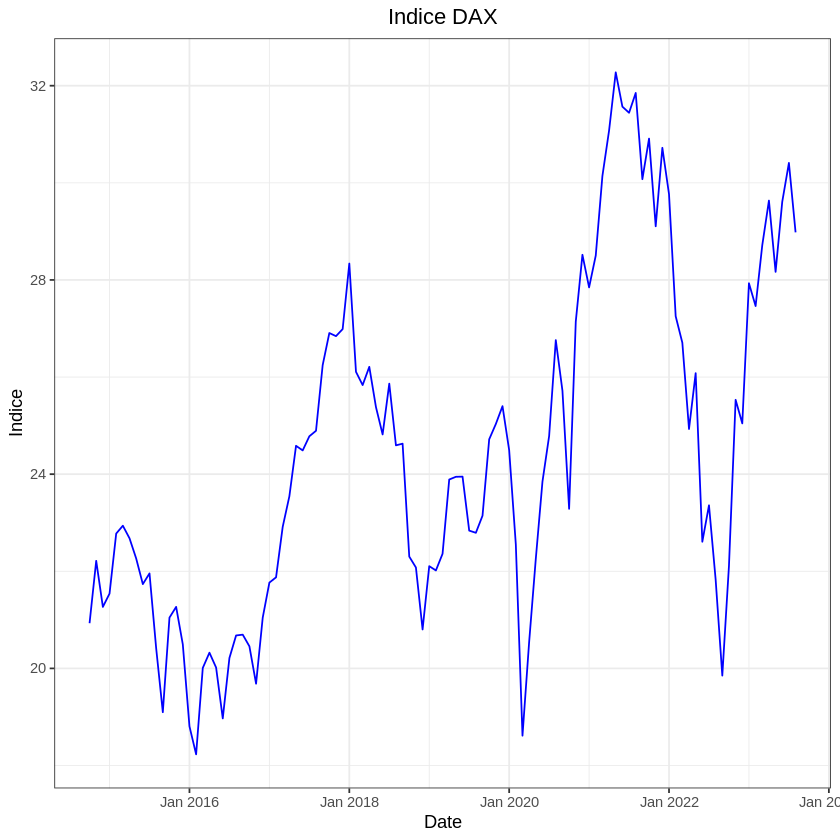

In [11]:
library(ggplot2)
p1<-ggplot(data=DAX,aes(x=Date,y=DAX.DAX_monthly.Adjusted))+geom_line(colour='blue')+ggtitle('Indice DAX')+xlab('Date')+ylab('Indice')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p1

D'apres la representation graphique de DAX, on retrouve que le modèle n'est pas $\underline{stationnaire}$

##Tests sans la période Covid : 2010:T1 à 2019:T4



On exclut les observations à partir du premier trimestre de l'année 2020. Les résultats des tests de racine unitaire et de stationnarité ne sont modifiés. On peut dire aussi qu'ils sont robustes à cette modification de la période de test


les autocorrélogrammes simples et partiels des séries DAX:

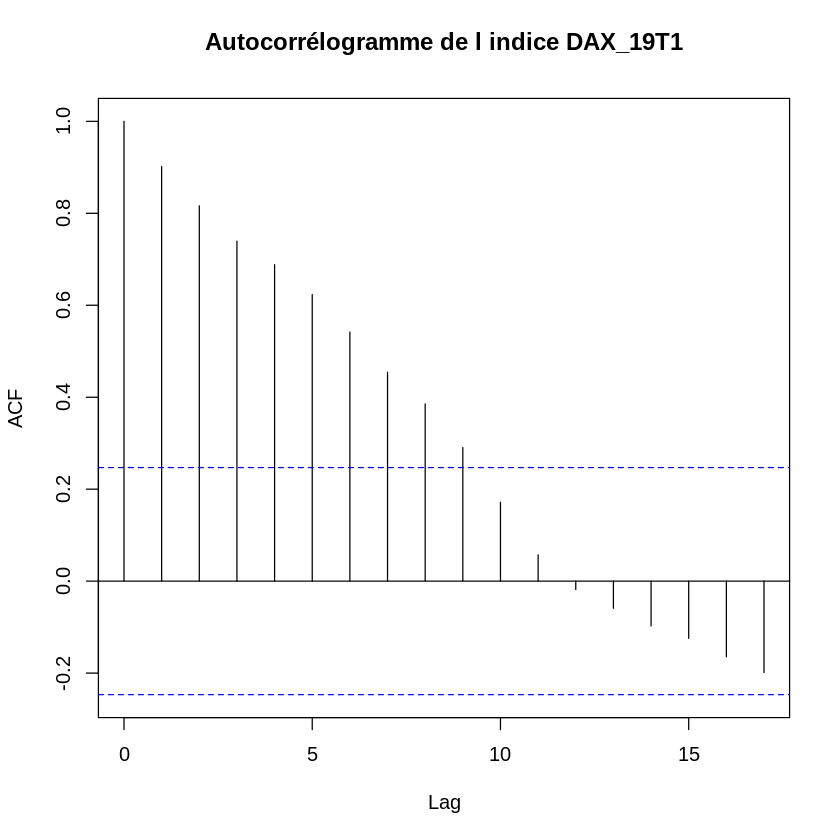

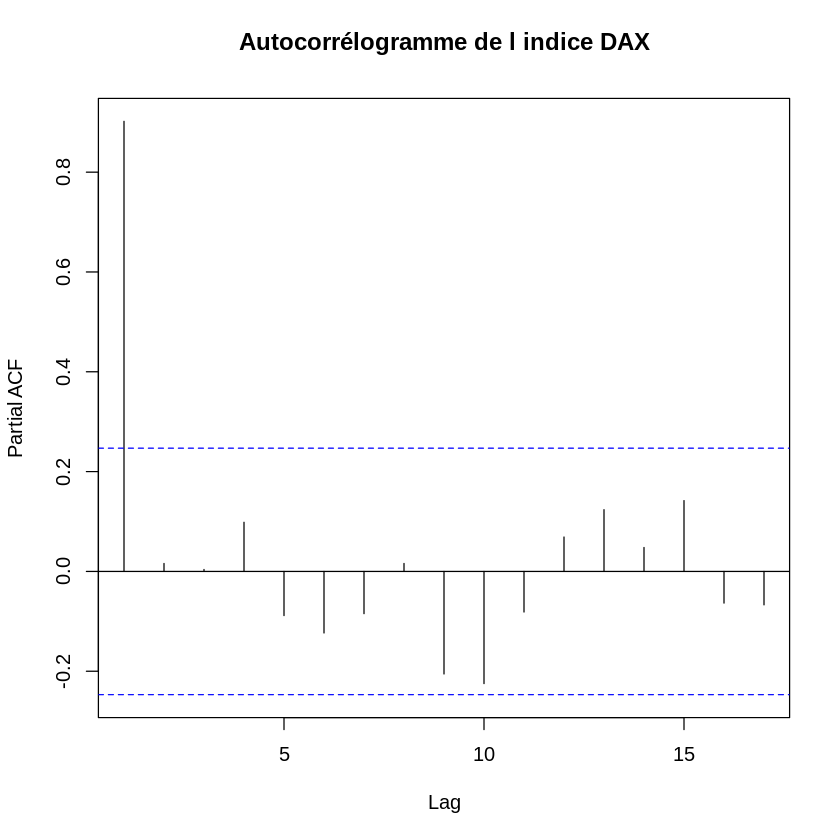

In [13]:
DAX_19T1=DAX[DAX$Date<"2020-01-01",]
acf(DAX_19T1$DAX.DAX_monthly.Adjusted, main = 'Autocorrélogramme de l indice DAX_19T1')
pacf(DAX_19T1$DAX.DAX_monthly.Adjusted, main='Autocorrélogramme de l indice DAX')

##Commentaire

##Test de Dickey-Fuller augmenté

Importation de la librairie urca

In [12]:
install.packages('urca')
library (urca)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Regression de test:
$\Delta\,x_{t}=ρx_{t-1}+ϵ_{t}\,avec ρ=Φ_{1}-1$

Test de dickey Fuller:

$$\left\lbrace\begin{array}{l} H_{0}\,:\, Φ=1\,\Leftrightarrowρ =0 \Rightarrow\,x_{t}\,non\,stationnaire\\
H_{1}\,:\,Φ1 < 1\Leftrightarrow\, ρ< 0\Rightarrow \,x_{t}\,stationnaire
\end{array} \right.$$

##**Etape 1 : avec constante et tendance déterministe**
On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

In [16]:
adf1<-ur.df(y =DAX_19T1$DAX.DAX_monthly.Adjusted,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34313 -0.51922  0.05632  0.60169  1.79592 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.42311    1.37569   1.761   0.0843 .
z.lag.1     -0.12417    0.06754  -1.838   0.0719 .
tt           0.01356    0.01041   1.303   0.1985  
z.diff.lag   0.04690    0.14024   0.334   0.7395  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9839 on 50 degrees of freedom
Multiple R-squared:  0.06524,	Adjusted R-squared:  0.009152 
F-statistic: 1.163 on 3 and 50 DF,  p-value: 0.3331


Value of test-statistic is: -1.8384 1.2483 1.7425 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88 

La statistique du test ADF est égale à $t_{ADF}$=-1.8384
.$t_{ADF}$=-1.8384>-3.45 Les seuils de rejet figurent sur la ligne tau3.
 pour un risque de première espèce de 5%. On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test
 est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.

 On passe au modèle avec une constante uniquement.



##**Etape 2 : avec constante**

In [17]:
adf2<-ur.df(y = DAX_19T1$DAX.DAX_monthly.Adjusted,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26118 -0.54627  0.05268  0.53825  1.64258 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.77245    1.29062   1.373    0.176
z.lag.1     -0.07462    0.05620  -1.328    0.190
z.diff.lag   0.03138    0.14068   0.223    0.824

Residual standard error: 0.9907 on 51 degrees of freedom
Multiple R-squared:  0.03349,	Adjusted R-squared:  -0.004414 
F-statistic: 0.8836 on 2 and 51 DF,  p-value: 0.4195


Value of test-statistic is: -1.3277 1.0095 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


La statistique du test ADF est égale à $t_{ADF}=-1.3277$
.Les seuils de rejet figurent sur la ligne tau2. La statistique de test $t_{ADF}=-1.3277>-2.93$
 pour le risque de première espèce de 5% est supérieure : on ne rejette pas l'hypothèse nulle de racine unitaire. On ne rejette pas non plus l'hypothèse nulle de racine unitaire pour les risques de première espèce de 1% et 10%.

###**Etape 3: Sans constante ni tendance déterministe**

In [20]:
adf3<-ur.df(y = DAX_19T1$DAX.DAX_monthly.Adjusted,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37783 -0.55666  0.06613  0.61050  1.89542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1     0.002143   0.005929   0.362    0.719
z.diff.lag -0.009282   0.138698  -0.067    0.947

Residual standard error: 0.9991 on 52 degrees of freedom
Multiple R-squared:  0.002538,	Adjusted R-squared:  -0.03583 
F-statistic: 0.06614 on 2 and 52 DF,  p-value: 0.9361


Value of test-statistic is: 0.3615 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


La statistique du test ADF est égale à $t_{ADF}=0.3615$
. Les seuils de rejet figurent sur la ligne tau1. La statistique de test $t_{ADF}=0.3615>-1.95$
 est supérieure au seuil de rejet pour le risque de première espèce de 5% : on ne rejette pas l'hypothèse nulle de racine unitaire. On ne rejette pas non plus l'hypothèse nulle de racine unitaire pour les risques de première espèces de 1% et 10%.

###Conclusion sur les résultats de tests ADF
A l'issus de la séquence des tests ADF on conclut que le DAX est un processus DS sans dérive.

##Test de stationnarité de KPSS

On applique le test de KPSS. Dans ce cas l'hypothèse nulle est que la série est stationnaire autour d'une tendance déterministe ou autour d'une constante.

Dans la spécification du test kpss :

type : sert à spécifier la forme de la composante déterministe (tau = tendance déterministe, mu = constante),

lags : sert à spécifier la façon dont le test va corriger l'autoccorélation les résidus. On choisit l'option "long" qui permet de corriger une autocorrélation importante/

test de kpsss:

$$\left\lbrace\begin{array}{l} H_{0}\,:\,x_{t}\,stationnaire\\
H_{1}\,:\,x_{t}\,non\,stationnaire
\end{array} \right.$$

###Test de stationnarité autour d'une tendance déterministe

In [21]:
kpss_tau<-ur.kpss(y=DAX_19T1$DAX.DAX_monthly.Adjusted,type="tau",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 10 lags. 

Value of test-statistic is: 0.0825 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test est égale à $LM_{KPSS}$=0.0825. Le seuil de rejet pour un risque de première espèce est égal à 0.146. On a donc $LM_{KPSS}$ = 0.0825< 0.146: on ne rejette pas l'hypothèse de stationnarité autour d'une tendance déterministe. On ne peut rejeter non plus l'hypothèse de stationnarité pour les risques de première espèce de 1% et 10%;

###Test de stationnarité autour d'une constante

In [25]:
kpss_mu<-ur.kpss(y=DAX_19T1$DAX.DAX_monthly.Adjusted,type="mu",lags="long")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.3199 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


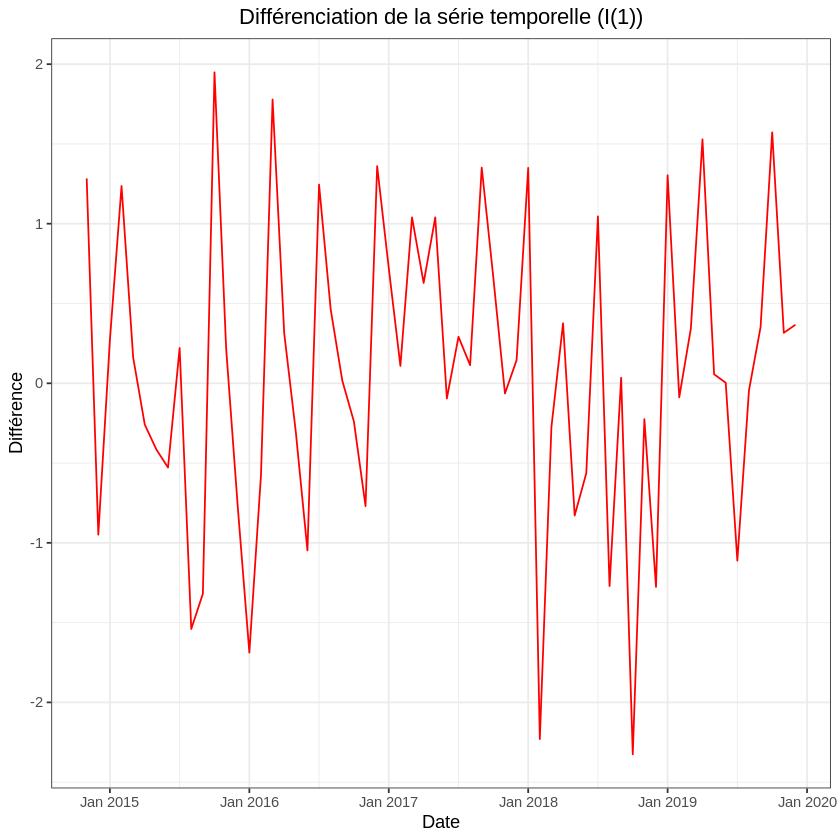

In [15]:
# Calcul des premières différences de la série temporelle
DAX_diff_19 <- diff(DAX_19T1$DAX.DAX_monthly.Adjusted, differences = 1)

# Création d'un data frame pour ggplot
df <- data.frame(Date = DAX_19T1$Date[-1], DAX_diff = DAX_diff_19)

# Création de l'objet ggplot
p_diff <- ggplot(data = df, aes(x = Date, y = DAX_diff)) +
  geom_line(colour = 'red') +
  ggtitle('Différenciation de la série temporelle (I(1))') +
  xlab('Date') +
  ylab('Différence') +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

# Affichage du graphique
print(p_diff)



##Tests sur la période 2010:T1 à 2023:T4

On ajoute maintenant la période du covid qui se caractérise par une explosion temporaire du taux de chômage à des niveaux sans précédent dans l'échantillon. En fin de période, le taux de chômage est revenu à des niveaux comparables à ceux observés avant le covid. L'objectif est voir dans quelle mesure l'inclusion de cette période peut avoir un effet sur les tests de racine unitaire et de stationnarité.

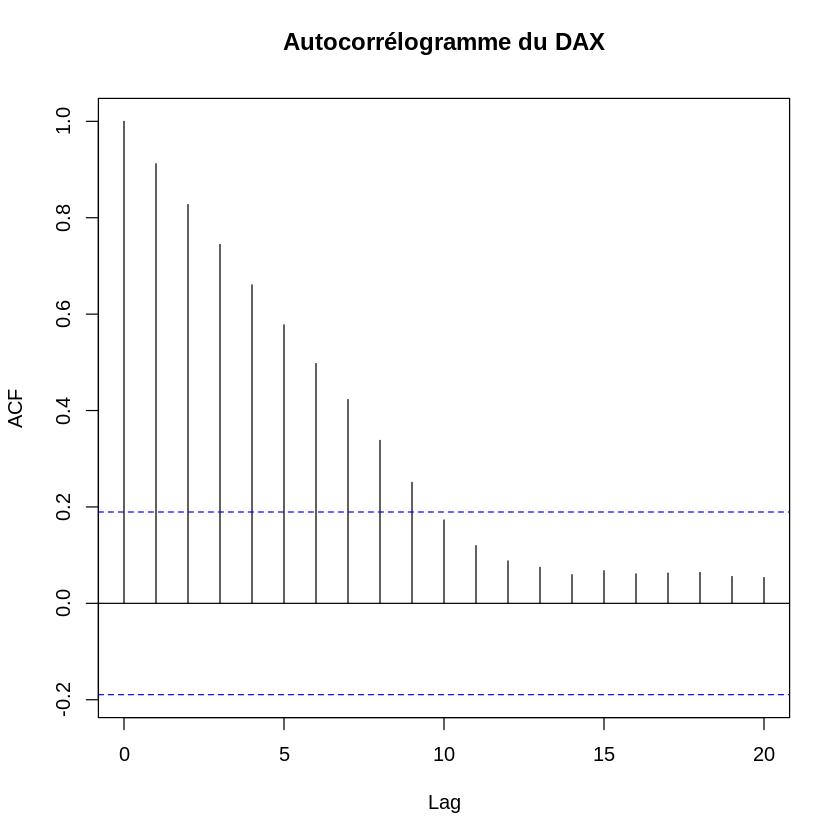

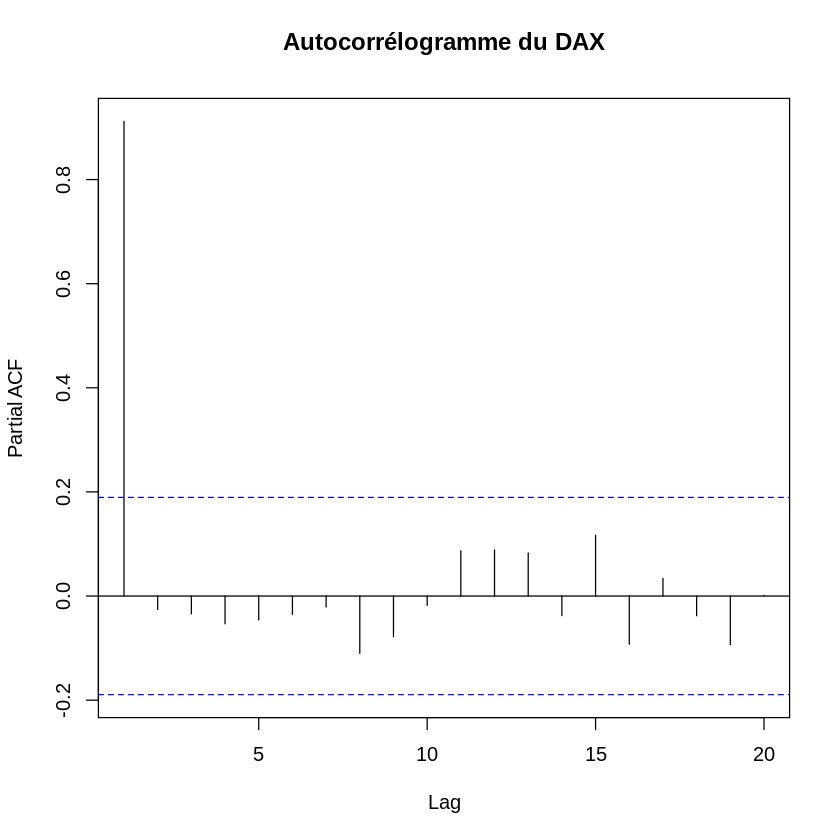

In [16]:
acf_DAX<-acf(x=DAX$DAX.DAX_monthly.Adjusted,main='Autocorrélogramme du DAX')
pacf_DAX<-pacf(x=DAX$DAX.DAX_monthly.Adjusted,main='Autocorrélogramme du DAX')

*Commentaires*

* Pas de changement majeur de l'autocorrélogramme.
* Aucune autocorrélation partielle n'est significative

##Test de Dickey-Fuller augmenté

###Etape 1 : avec constante et tendance déterministe

In [17]:
library(urca)

In [18]:
adf1_20<-ur.df(y =DAX$DAX.DAX_monthly.Adjusted,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1_20)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-4.304 -0.933  0.121  1.005  3.511 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.722700   1.099760   2.476   0.0151 *
z.lag.1     -0.134645   0.052503  -2.565   0.0119 *
tt           0.011499   0.006413   1.793   0.0762 .
z.diff.lag   0.033724   0.103682   0.325   0.7457  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.378 on 94 degrees of freedom
Multiple R-squared:  0.06678,	Adjusted R-squared:  0.03699 
F-statistic: 2.242 on 3 and 94 DF,  p-value: 0.08846


Value of test-statistic is: -2.5645 2.306 3.3078 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75  4.07
phi3  8.43 

on rejettte H0

###Etape 2 : avec constante

In [19]:
adf2_20<-ur.df(y = DAX$DAX.DAX_monthly.Adjusted,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2_20)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1435 -0.9620  0.0003  1.0627  3.7075 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.903296   1.011914   1.881   0.0631 .
z.lag.1     -0.074386   0.040806  -1.823   0.0715 .
z.diff.lag   0.009551   0.103994   0.092   0.9270  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.394 on 95 degrees of freedom
Multiple R-squared:  0.03486,	Adjusted R-squared:  0.01454 
F-statistic: 1.716 on 2 and 95 DF,  p-value: 0.1854


Value of test-statistic is: -1.8229 1.8092 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


ON REJETTTEEE


##Etape 3 : sans constante ni tendance déterministe

In [20]:
adf3_20<-ur.df(y = DAX$DAX.DAX_monthly.Adjusted,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3_20)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0361 -0.8468  0.0986  1.0186  3.7384 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1     0.001616   0.005765   0.280    0.780
z.diff.lag -0.032663   0.102876  -0.317    0.752

Residual standard error: 1.413 on 96 degrees of freedom
Multiple R-squared:  0.001711,	Adjusted R-squared:  -0.01909 
F-statistic: 0.08225 on 2 and 96 DF,  p-value: 0.9211


Value of test-statistic is: 0.2803 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


ON rejetteee H0 : DAX ENTRE 2010 ET 2023 EST DS I(1).

### **Conclusion**

Les résultats des tests ADF nous amènent à conclure que la série du DAX est une série DS sans tendance ni constante. Les conclusions des tests ADF ne sont pas modifiés par la période du covid.

## ***Test de stationnarité de KPSS¶***

### Stationnarité autour d'une tendance déterministe

In [22]:
kpss_tau_20<-ur.kpss(y=DAX$DAX.DAX_monthly.Adjusted,type="tau",lags="long")
summary(kpss_tau_20)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 12 lags. 

Value of test-statistic is: 0.0429 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


ON REJETTE PAS H0

### Stationnarité autour d'une constante


In [21]:
kpss_mu_20<-ur.kpss(y=DAX$DAX.DAX_monthly.Adjusted,type="mu",lags="long")
summary(kpss_mu_20)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 12 lags. 

Value of test-statistic is: 0.5704 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


ON REJETTE H0 POUR 10PCT ET 5PCT ET ON ACCEPTE POUR 2.5PCT ET 1PCT.

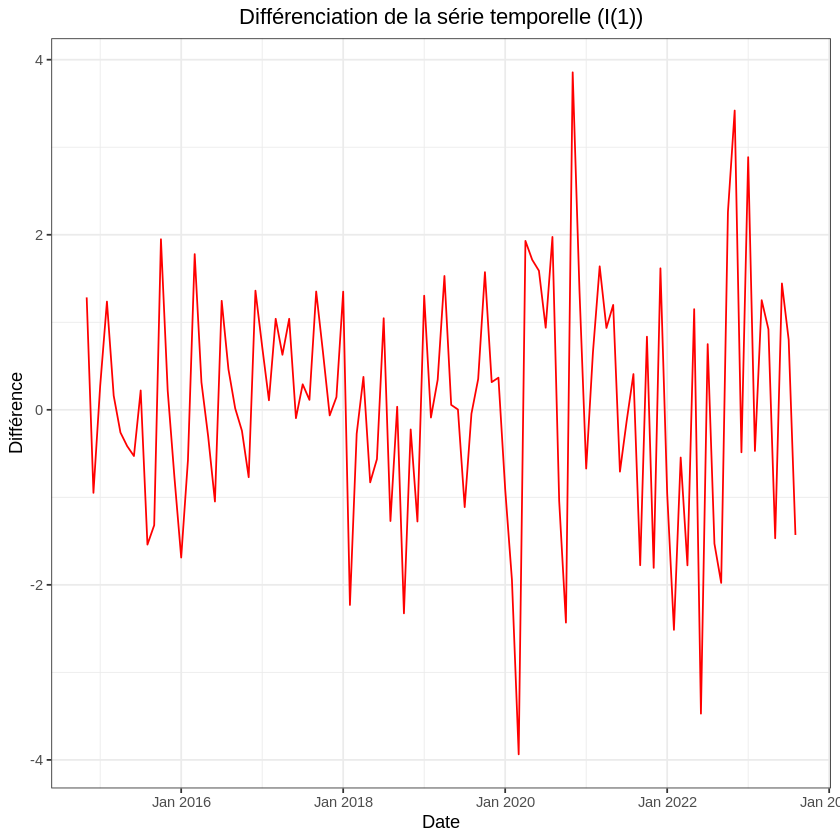

In [26]:
# Calcul des premières différences de la série temporelle
DAX_diff_20 <- diff(DAX$DAX.DAX_monthly.Adjusted, differences = 1)

# Création d'un data frame pour ggplot
df <- data.frame(Date = DAX$Date[-1], DAX_diff = DAX_diff_20)

# Création de l'objet ggplot
p_diff <- ggplot(data = df, aes(x = Date, y = DAX_diff)) +
  geom_line(colour = 'red') +
  ggtitle('Différenciation de la série temporelle (I(1))') +
  xlab('Date') +
  ylab('Différence') +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

# Affichage du graphique
print(p_diff)

#**CPI**

# **Les representations graphiques et autocorrélogrammes simples et partiels des séries**

Warning message:
“Use of `CPI$Value` is discouraged.
ℹ Use `Value` instead.”


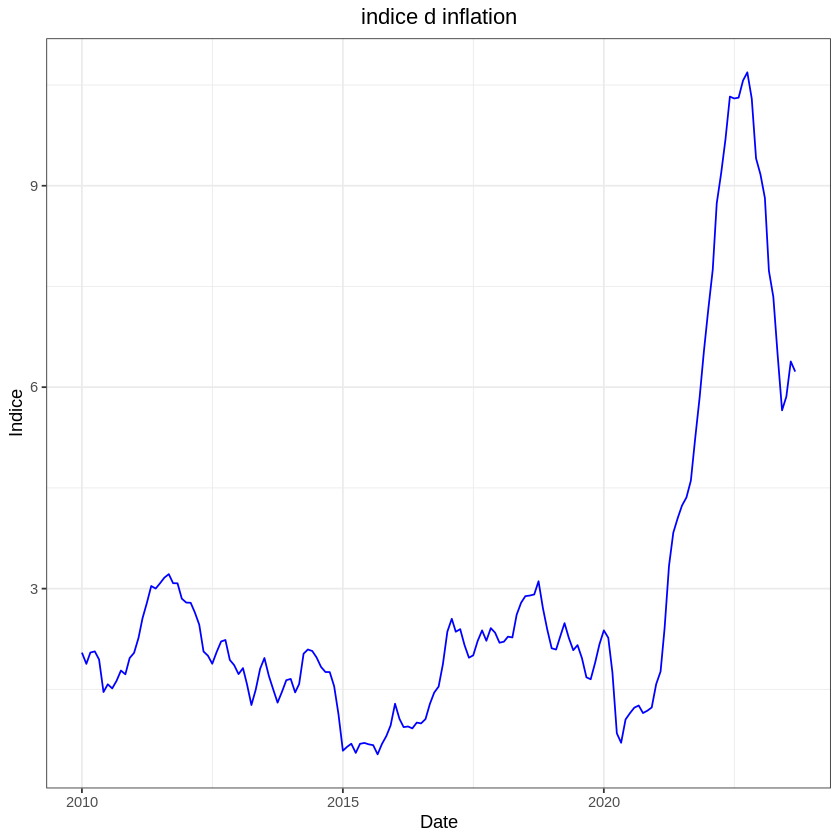

In [29]:
C1<-ggplot(data=CPI,aes(x=Date,y=CPI$Value))+geom_line(colour='blue')+ggtitle('indice d inflation')+xlab('Date')+ylab('Indice')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
C1